In [10]:
import tensorflow as tf
import tensorflow.contrib.slim as slim
import numpy as np
import os
import cv2
import inception_v3
import json
# just remove line below if want to use GPU
#os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [2]:
with open('real-label.json', 'r') as fopen:
    labels = json.load(fopen)

In [12]:
image = cv2.cvtColor(cv2.imread('husein.png'), cv2.COLOR_BGR2RGB)
if image.shape[2] == 4:
    image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
image.shape

(1028, 756, 3)

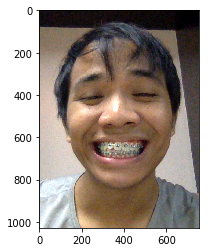

In [16]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

In [4]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
X = tf.placeholder(tf.float32,[None,None,3])
image = X / 128.  - 1
image = tf.expand_dims(image, 0)
image = tf.image.resize_images(image, (299, 299))
with slim.arg_scope(inception_v3.inception_v3_arg_scope()):
    logits, endpoints = inception_v3.inception_v3(image,num_classes=1001,is_training=False)
sess.run(tf.global_variables_initializer())
saver = tf.train.Saver()
saver.restore(sess, 'inception_v3.ckpt')

INFO:tensorflow:Restoring parameters from inception_v3.ckpt


In [5]:
%%time
sess.run(logits,feed_dict={X:img})
# first time slow, GPU caching

CPU times: user 756 ms, sys: 212 ms, total: 968 ms
Wall time: 968 ms


array([[-0.1941728 , -0.08063498, -0.39191484, ..., -1.0787625 ,
         0.18444908,  0.67688626]], dtype=float32)

In [14]:
%%time
labels[str(np.argmax(sess.run(logits,feed_dict={X:image})[0]))]
# repeat same experiment to get accurate time

CPU times: user 32 ms, sys: 8 ms, total: 40 ms
Wall time: 34.5 ms


'Band Aid'